## Proposed framework

This code is for our proposed framework. The code is written in Python 2.7 and some open source libraries including Pandas, Numpy, Scikit-learn, Matplotlib, and Keras are used. 


In order to reproduce the results illustrated in our report, you simply run all of the following codes sequentially. The given datasets (four .csv files) should be in the same directory where the code is.

In [1]:
from calendar import monthrange
import json 
import pandas as pd
import time

data = {}

for year in xrange(2013, 2018):
    path = 'TAMIDS_dataset/Chicago_taxi_trips' + str(year) + '.csv'

    start = time.time()
    
    # Load the dataset
    df = pd.read_csv(path)
    df = df[['Taxi ID', 'Trip Start Timestamp', 'Trip Seconds', 'Trip Miles', 'Trip Total', 'Payment Type', 'Pickup Community Area', 'Dropoff Community Area']]
    df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p')
#     df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'], format='%m/%d/%Y %I:%M:%S %p')
    
    df['weekly'] = df['Trip Start Timestamp'].apply(lambda ts: 1 + (ts.day - 1) / 7 + sum(monthrange(ts.year, month)[1] for month in xrange(1, ts.month)) / 7)
#     df['period(hourly)'] = df['Trip Start Timestamp'].apply(lambda ts: 1 + ts.hour)
#     df['period(daily)'] = df['Trip Start Timestamp'].apply(lambda ts: 1 + ts.day % 7)
#     df['period(monthly)'] = df['Trip Start Timestamp'].apply(lambda ts: ts.month)

    data.setdefault(year, df)
    
    end = time.time()
    
    print str(year) + " data loaded."
    print(end - start)

/Users/donghwashin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2013 data loaded.
787.808433056


/Users/donghwashin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2014 data loaded.
1562.62150002
2015 data loaded.
1619.66043091
2016 data loaded.
1172.57518792
2017 data loaded.
392.350533962


## Estimate distribution

In [2]:
import numpy as np
import math

# Extract data information

distribution_matrix = {}

for year in xrange(2013, 2017):
    big_list = []

    for i in xrange(0, 52):
        each = []
        for j in xrange(0, 4):
            col = []
            for k in xrange(0, 77):
                row = []
                for l in xrange(0, 77):
                    row.append([])
                col.append(row)
            each.append(col)
        big_list.append(each)
    
    distribution_matrix.setdefault(year, big_list)
    selected_data = data[year][['Taxi ID', 'Trip Seconds', 'Trip Miles', 'Trip Total', 'Payment Type', 'Pickup Community Area', 'Dropoff Community Area', 'weekly']]

    for row in selected_data.itertuples():
        try:
            trip_cost = float(row[4][1:])
                            
        except TypeError:
            trip_cost = 0.0
        
        trip_seconds = float(row[2])
        if math.isnan(trip_seconds) == True:
            trip_seconds = 0.0

        trip_miles = float(row[3])
        if math.isnan(trip_miles) == True:
            trip_miles = 0.0
        
        try:
            pickup = int(row[6])
        except ValueError: # in case of 'pickup' = NaN
#             pickup = 78
            continue
        
        try:
            dropoff = int(row[7])
        except ValueError: # in case of 'dropoff' = NaN
#             dropoff = 78
            continue
            
        pickup -= 1
        dropoff -= 1
        week = int(row[8]) - 1
        
#         if trip_seconds == 0.0 or trip_miles == 0.0 or trip_cost == 0.0:
#             continue
        
        distribution_matrix[year][week][0][pickup][dropoff].append(trip_seconds)
        distribution_matrix[year][week][1][pickup][dropoff].append(trip_miles)
        distribution_matrix[year][week][2][pickup][dropoff].append(trip_cost)
        distribution_matrix[year][week][3][pickup][dropoff].append(row[1])
    
#     for week in xrange(0, 52):
#         for pickup in xrange(0, 78):
#             for dropoff in xrange(0, 78):
#                 distribution_matrix[year][week][0][pickup][dropoff] = np.median(distribution_matrix[year][week][0][pickup][dropoff])
#                 distribution_matrix[year][week][1][pickup][dropoff] = np.median(distribution_matrix[year][week][1][pickup][dropoff])
#                 distribution_matrix[year][week][2][pickup][dropoff] = np.median(distribution_matrix[year][week][2][pickup][dropoff])
    
    print str(year) +  " done!"

2013 done!
2014 done!
2015 done!
2016 done!


In [ ]:
# for year in xrange(2013, 2017):
#     for week in xrange(0, 52):
#         for pickup in xrange(0, 78):
#             for dropoff in xrange(0, 78):
#                 distribution_matrix[year][week][0][pickup][dropoff] = 0.0 if math.isnan(distribution_matrix[year][week][0][pickup][dropoff]) else distribution_matrix[year][week][0][pickup][dropoff]
#                 distribution_matrix[year][week][1][pickup][dropoff] = 0.0 if math.isnan(distribution_matrix[year][week][1][pickup][dropoff]) else distribution_matrix[year][week][1][pickup][dropoff] 
#                 distribution_matrix[year][week][2][pickup][dropoff] = 0.0 if math.isnan(distribution_matrix[year][week][2][pickup][dropoff]) else distribution_matrix[year][week][2][pickup][dropoff]

In [3]:
# Compute the number of taxis

# for year in xrange(2013, 2017):
#     for week in xrange(0, 52):
#         for pickup in xrange(0, 78):
#             for dropoff in xrange(0, 78):
#                 distribution_matrix[year][week][3][pickup][dropoff] = len(set(distribution_matrix[year][week][3][pickup][dropoff]))

## For testing purpose

In [3]:
# # Get the number of trips of 2017

# n_trips = []

# for week in xrange(0, 52):
#     each_week = []
#     for i in xrange(0, 77):
#         empty_lists = []
#         for j in xrange(0, 77):
#             empty_lists.append(0)
#         each_week.append(empty_lists)
#     n_trips.append(each_week)

# selected_data = data[2017][['Pickup Community Area', 'Dropoff Community Area', 'weekly']]

# for row in selected_data.itertuples():        
#     try:
#         pickup = int(row[1])
#     except ValueError: # in case of 'pickup' = NaN
# #         pickup = 78
#         continue

#     try:
#         dropoff = int(row[2])
#     except ValueError: # in case of 'dropoff' = NaN
#         continue
# #         dropoff = 78

#     pickup -= 1
#     dropoff -= 1
#     week = int(row[3]) - 1

#     n_trips[week][pickup][dropoff] += 1

In [3]:
# Count the number of trips for each year

n_trips = {}

for year in xrange(2013, 2017):
    each_year = []
    for week in xrange(0, 52):
        each_week = []
        for i in xrange(0, 77):
            empty_lists = []
            for j in xrange(0, 77):
                empty_lists.append(0)
            each_week.append(empty_lists)
        each_year.append(each_week)
    n_trips.setdefault(year, each_year)

for year in xrange(2013, 2017):
    selected_data = data[year][['Pickup Community Area', 'Dropoff Community Area', 'weekly']]

    for row in selected_data.itertuples():        
        try:
            pickup = int(row[1])
        except ValueError: # in case of 'pickup' = NaN
    #         pickup = 78
            continue

        try:
            dropoff = int(row[2])
        except ValueError: # in case of 'dropoff' = NaN
            continue
    #         dropoff = 78

        pickup -= 1
        dropoff -= 1
        week = int(row[3]) - 1

        n_trips[year][week][pickup][dropoff] += 1
        
print "done!"

done!


## Estimate the number of trips for 2017 (Forecasting; also used for our baselines)

In [263]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

def moving_average(data,window):
    ret=[]
    length=len(data)
    shell=[]
    for i in xrange(length):
        shell.append(data[i])
        #if iteration is smaller than windowsize
        if i<window:
            ret.append(float(sum(shell))/len(shell))
        else:
            window_observed=shell[len(shell)-window:]
            ret.append(float(sum(window_observed))/window)
    return ret

def seasonal(data,m_ave,window):
    ret=[]
    for i in xrange(window):
        season=[]
#         for j in xrange(3):
        for j in xrange(4):
            week=i+j*window
            #use window size as period to take average of seasonality
            if m_ave[week]!=0:
                w_season=float(data[week])/m_ave[week]
                season.append(w_season)
        #handle routes with 0 rides
        if len(season)!=0:
            ret.append(sum(season)/len(season))
        else:
            ret.append(0)
    return ret

def regressions(ma):
    np_ma = np.array(ma)
#     x=range(1,157)
    x=range(1,209)
    x=[[x[i]]for i in range(0,len(x))]
    #Ridge Regression fit
    clf = Ridge(alpha=1e-10)
    clf.fit(x, np_ma) 

    #Lasso Regression fit
    model = Lasso(alpha=1e-10)
    model.fit(x, np_ma) 

#     pred_x=range(157,209)
    pred_x=range(209,261)
    pred_x=[[pred_x[i]]for i in range(0,len(pred_x))]
    
    #make predictions
    ridge_result=clf.predict(pred_x)
    lasso_result=model.predict(pred_x)
    
    return ridge_result, lasso_result

def forecast(data, windowsize):
    #ret should return prediction 2017 for lasso and Ridge regression implemented on 2017 data
            #calculate moving average, seasonal aspect of windowsize for each route
    ret={}
    ret["lasso"]=[]
    ret["ridge"]=[]
    ave=moving_average(data,windowsize)
    season=seasonal(data,ave,windowsize)
    ridge, lasso=regressions(ave)

    for k in xrange(52):
        weight=season[k]
        ret["lasso"].append(lasso[k]*weight)
        ret["ridge"].append(ridge[k]*weight)
    return ret

In [264]:
estimated_n_trips = []

for week in xrange(0, 52):
    each_week = []
    for pickup in xrange(0, 77):
        row = []
        for dropoff in xrange(0, 77):
            row.append(0)
        each_week.append(row)
    estimated_n_trips.append(each_week)
    

for pickup in xrange(0, 77):
    for dropoff in xrange(0, 77):
        y = []
#         for year in xrange(2013, 2016):
        for year in xrange(2013, 2017):    
            for week in xrange(0, 52):
                y.append(n_trips[year][week][pickup][dropoff])
        
        predictions = forecast(y, 52)
        prediction = predictions['ridge']
        
        for week in xrange(0, 52):
            estimated_n_trips[week][pickup][dropoff] = 0 if prediction[week] < 0 else int(prediction[week])
            
print "done!"

done!


## Randomly pick taxi trips from 2013 - 2016 data

In [265]:
np.random.seed(43) # For reproducibility

import math

picked_total = []

for week in xrange(0, 52):
    each_week = []
    
    for pickup in xrange(0, 77):
        picked_row = []
        
        for dropoff in xrange(0, 77):
            picked = []
            picked_numbers = np.random.rand(estimated_n_trips[week][pickup][dropoff])

            for num in picked_numbers:
                if num <= 0.1:
                    if len(distribution_matrix[2013][week][2][pickup][dropoff]) == 0:
                        continue
                    rand_index = np.random.randint(len(distribution_matrix[2013][week][2][pickup][dropoff]))
                    picked_cost = distribution_matrix[2013][week][2][pickup][dropoff][rand_index]
                elif num <= 0.3:
                    if len(distribution_matrix[2014][week][2][pickup][dropoff]) == 0:
                        continue
                    rand_index = np.random.randint(len(distribution_matrix[2014][week][2][pickup][dropoff]))
                    picked_cost = distribution_matrix[2014][week][2][pickup][dropoff][rand_index]
                elif num <= 0.6:
                    if len(distribution_matrix[2015][week][2][pickup][dropoff]) == 0:
                        continue
                    rand_index = np.random.randint(len(distribution_matrix[2015][week][2][pickup][dropoff]))
                    picked_cost = distribution_matrix[2015][week][2][pickup][dropoff][rand_index]
                else:
                    if len(distribution_matrix[2016][week][2][pickup][dropoff]) == 0:
                        continue
                    rand_index = np.random.randint(len(distribution_matrix[2016][week][2][pickup][dropoff]))
                    picked_cost = distribution_matrix[2016][week][2][pickup][dropoff][rand_index]
                
                picked.append(picked_cost)
            picked_row.append(picked)
                
        each_week.append(picked_row)
    picked_total.append(each_week)

In [266]:
for week in xrange(0, 52):
    for pickup in xrange(0, 77):
        for dropoff in xrange(0, 77):
            picked_total[week][pickup][dropoff] = sum(picked_total[week][pickup][dropoff])

In [267]:
for week in xrange(0, 52):
    for pickup in xrange(0, 77):
        for dropoff in xrange(0, 77):
            picked_total[week][pickup][dropoff] = 0.0 if math.isnan(picked_total[week][pickup][dropoff]) else picked_total[week][pickup][dropoff]

In [33]:
# mean_n_taxis = []

# for week in xrange(0, 52):
#     each_week = []
#     for pickup in xrange(0, 78):
#         row = []
#         for dropoff in xrange(0, 78):
#             row.append(np.mean([distribution_matrix[year][week][3][pickup][dropoff] for year in xrange(2013, 2017)]))
#         each_week.append(row)
#     mean_n_taxis.append(each_week)

In [34]:
# for week in xrange(0, 52):
#     for pickup in xrange(0, 78):
#         for dropoff in xrange(0, 78):
#             try:
#                 picked_total[week][pickup][dropoff] /= float(mean_n_taxis[week][pickup][dropoff])
#             except ZeroDivisionError:
#                 None

## Load the precomputed median weekly revenue data (ground truth)

In [268]:
# load the median weekly revenue data
import json

with open('median_weekly_revenue_data.json', 'r') as fp:
    median_weekly_revenue_data = json.load(fp)

## Keras Deep Neural Network Regressor
Feature vectors contain 'trip seconds', 'trip miles', and 'payment type'. Given these vectors, the regressor predicts a trip cost.

In [269]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import optimizers
import matplotlib.pyplot as plt

# import os
# import GPUtil
# import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session

# os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [270]:
# define base model
def base_model():
    model = Sequential()
    model.add(Dense(512, input_dim = 5929, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(512, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(5929, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    adam = optimizers.Adam(lr=0.00001)

    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer = adam)
    
    return model

In [271]:
estimator = KerasRegressor(build_fn = base_model)

## Create feature vectors

In [272]:
y = []
for year in ['2013', '2014', '2015', '2016']:
    y += median_weekly_revenue_data[year]

In [273]:
norm_factor = np.array(2000.)
norm_factor2 = np.array(2650.) # for 2013 - 2016 normalization
# norm_factor2 = np.array(3300.) # for 2013 - 2015

In [274]:
X = []

for year in xrange(2013, 2017):
    for week in xrange(0, 52):
        temp = []
        for pickup in xrange(0, 77):
            for dropoff in xrange(0, 77):
                temp.append(sum(distribution_matrix[year][week][2][pickup][dropoff]))

        temp = temp / norm_factor
        X.append(temp)

print len(X)

208


In [275]:
new_year = []

for week in xrange(0, 52):
    new_row = []
    for pickup in xrange(0, 77):
        new_row += picked_total[week][pickup]
        
    new_row = new_row / norm_factor2
    new_year.append(new_row)

print len(new_year)

52


## Predict 2017 median daily / hourly / weekly revenue

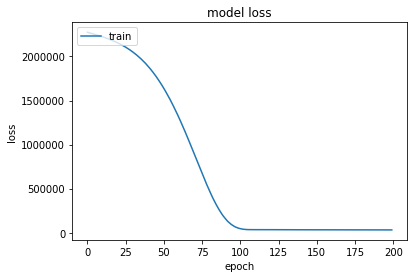

In [276]:
history = estimator.fit(np.asarray(X), np.asarray(y), nb_epoch = 200, batch_size = 128, verbose = 0)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [277]:
prediction = estimator.predict(np.asarray(new_year))

In [278]:
print prediction

[  908.35742188  1051.08300781  1073.50524902  1129.83947754  1532.14355469
  1129.59033203  1162.82373047  1234.79980469  1245.34155273  1289.28369141
  1306.5760498   1184.5682373   1348.21374512  1324.78393555  1298.15209961
  1354.70275879   571.206604    1444.79467773  1355.84619141  1464.84301758
  1225.07739258  1961.43994141  1488.86853027  1405.02124023  1339.00500488
  1085.52661133  1186.20349121  1277.47668457  1296.234375     741.32012939
  1346.30822754  1226.06433105  1255.47192383  1175.65942383  1520.1138916
  1211.38903809  1323.14404297  1310.21069336   399.06756592  1343.67822266
  1348.73339844  1442.68371582  1352.81164551  1877.17773438  1290.65551758
  1331.87158203   862.0736084   1632.63024902  1251.07958984  1153.15490723
   667.72570801   375.22476196]


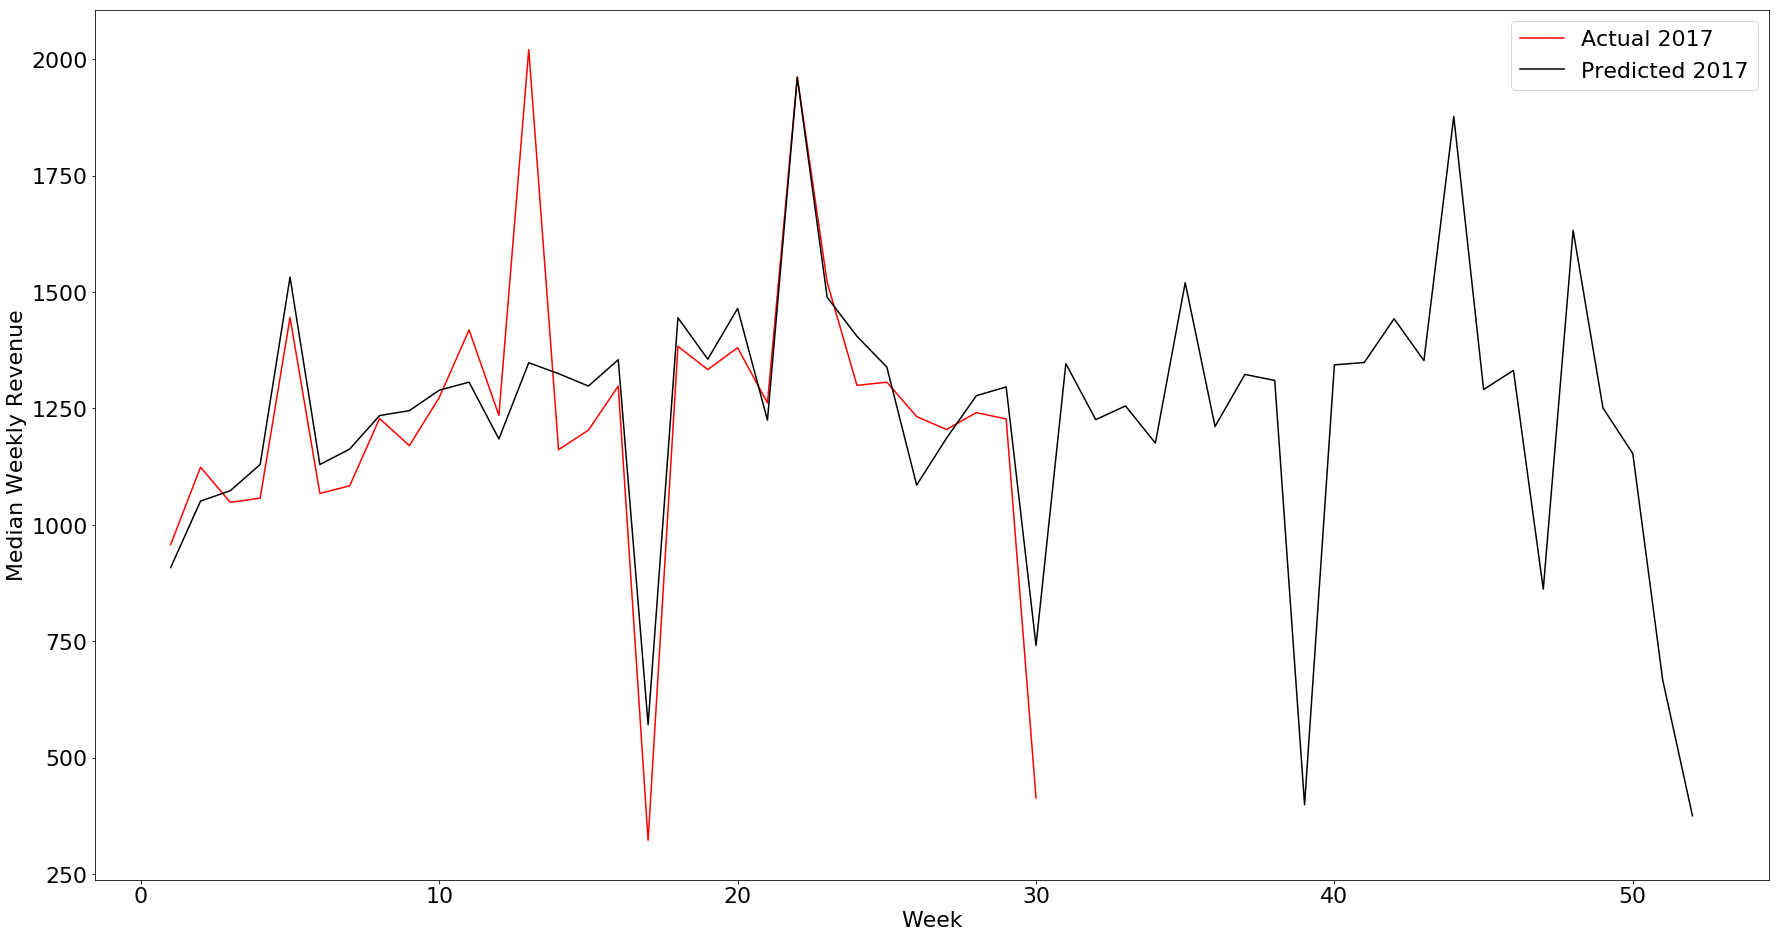

In [279]:
# plot result

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (30, 16))

y = median_weekly_revenue_data['2017']
plt.plot(np.arange(1, len(y) + 1), y, color = 'r', label = 'Actual 2017')
plt.plot(np.arange(1, 53), prediction, color = 'k', label = 'Predicted 2017')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Week', fontsize=22)
plt.ylabel('Median Weekly Revenue', fontsize=22)

plt.legend(fontsize=22)
plt.show()

In [280]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(median_weekly_revenue_data['2017'][0:30], prediction[0:30])
print "rmse: " + str(sqrt(mse))

rmse: 159.849601645


## Plot the result (2013 - 2017)

In [281]:
y = []
for year in ['2013', '2014', '2015', '2016']:
# for year in ['2013', '2014', '2015']:
    y += median_weekly_revenue_data[year]
    
actual_y = []
actual_y += median_weekly_revenue_data['2017']

print len(y)
print len(actual_y)

208
52


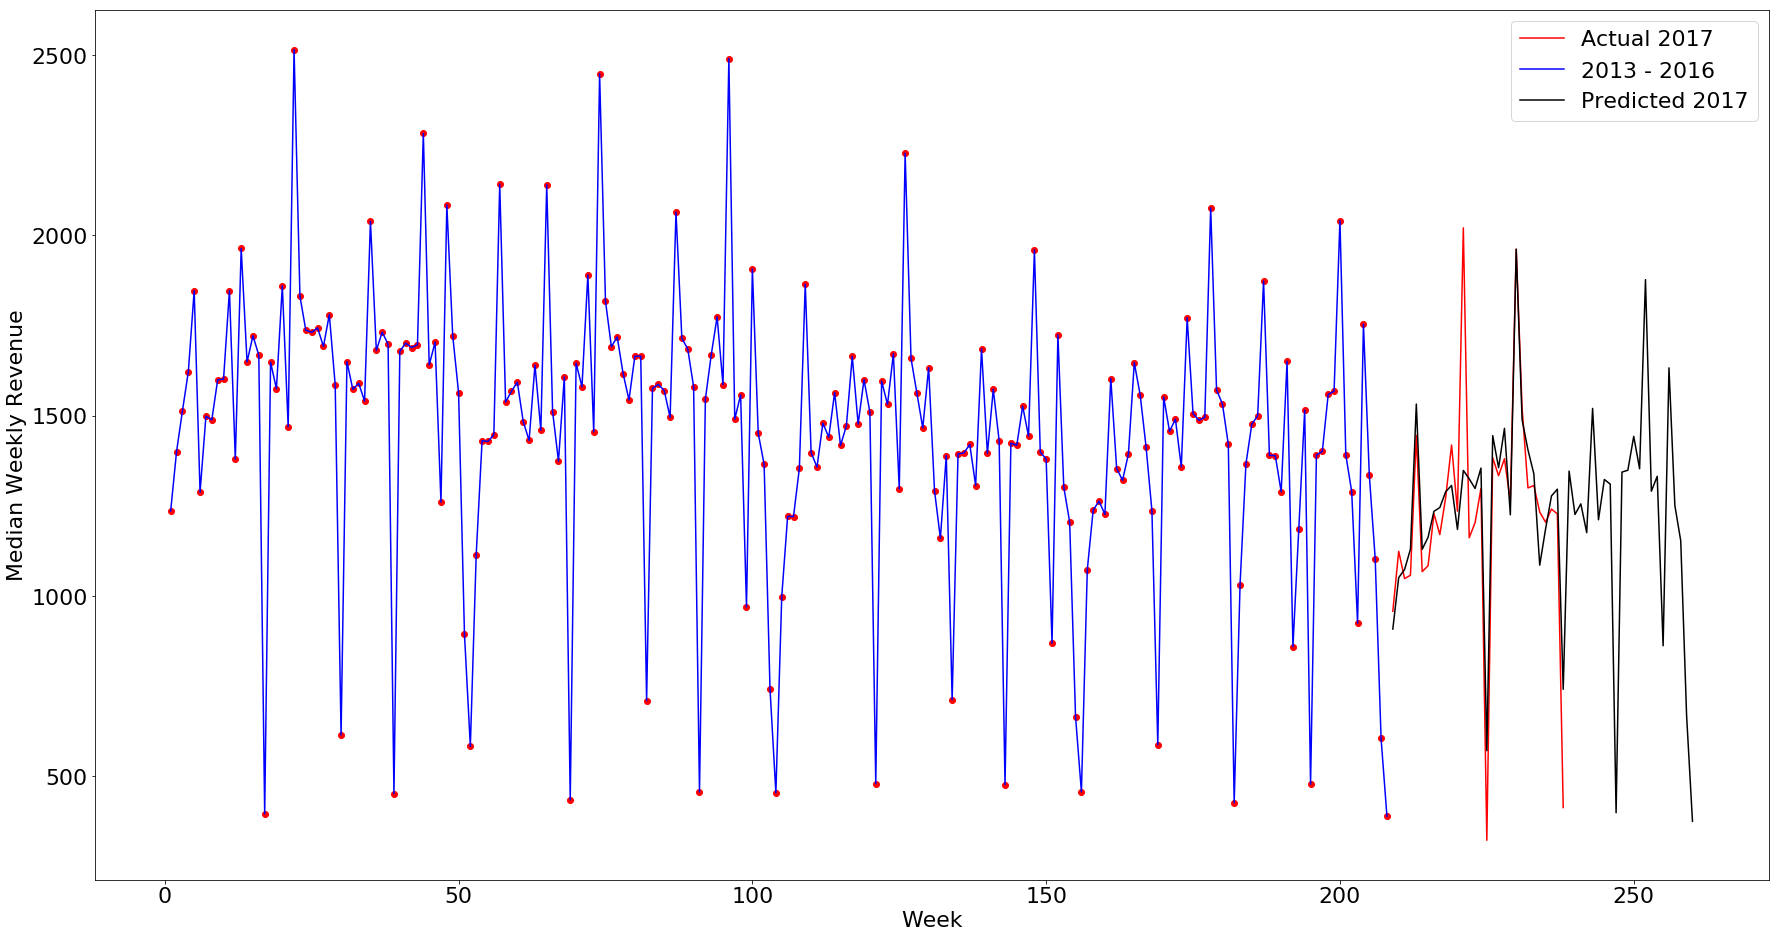

In [282]:
# plot result

import matplotlib.pyplot as plt
import numpy as np

# colors = ['g', 'r', 'k', 'm', 'c', 'y']
plt.figure(figsize = (30, 16))

plt.scatter(np.arange(1, 209), y, color = 'r')
plt.plot(np.arange(209, 261), actual_y, color = 'r', label = 'Actual 2017')
plt.plot(np.arange(1, 209), y, color = 'b', label = '2013 - 2016')
plt.plot(np.arange(209, 261), prediction, color = 'k', label = 'Predicted 2017')

# plt.scatter(np.arange(1, 157), y, color = 'r')
# plt.plot(np.arange(157, 209), actual_y, color = 'r', label = 'Actual 2017')
# plt.plot(np.arange(1, 209), y + prediction.tolist(), color = 'b', label = 'Predicted 2017')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Week', fontsize=22)
plt.ylabel('Median Weekly Revenue', fontsize=22)

plt.legend(fontsize=22)
plt.show()

## Generate baseline results

In [283]:
y = []
for year in ['2013', '2014', '2015', '2016']:
# for year in ['2013', '2014', '2015']:
    y += median_weekly_revenue_data[year]
    
actual_y = []
actual_y += median_weekly_revenue_data['2017']

print len(y)
print len(actual_y)

208
52


In [284]:
predictions = forecast(y, 52)
# predictions = predictions['lasso']
predictions = predictions['ridge']

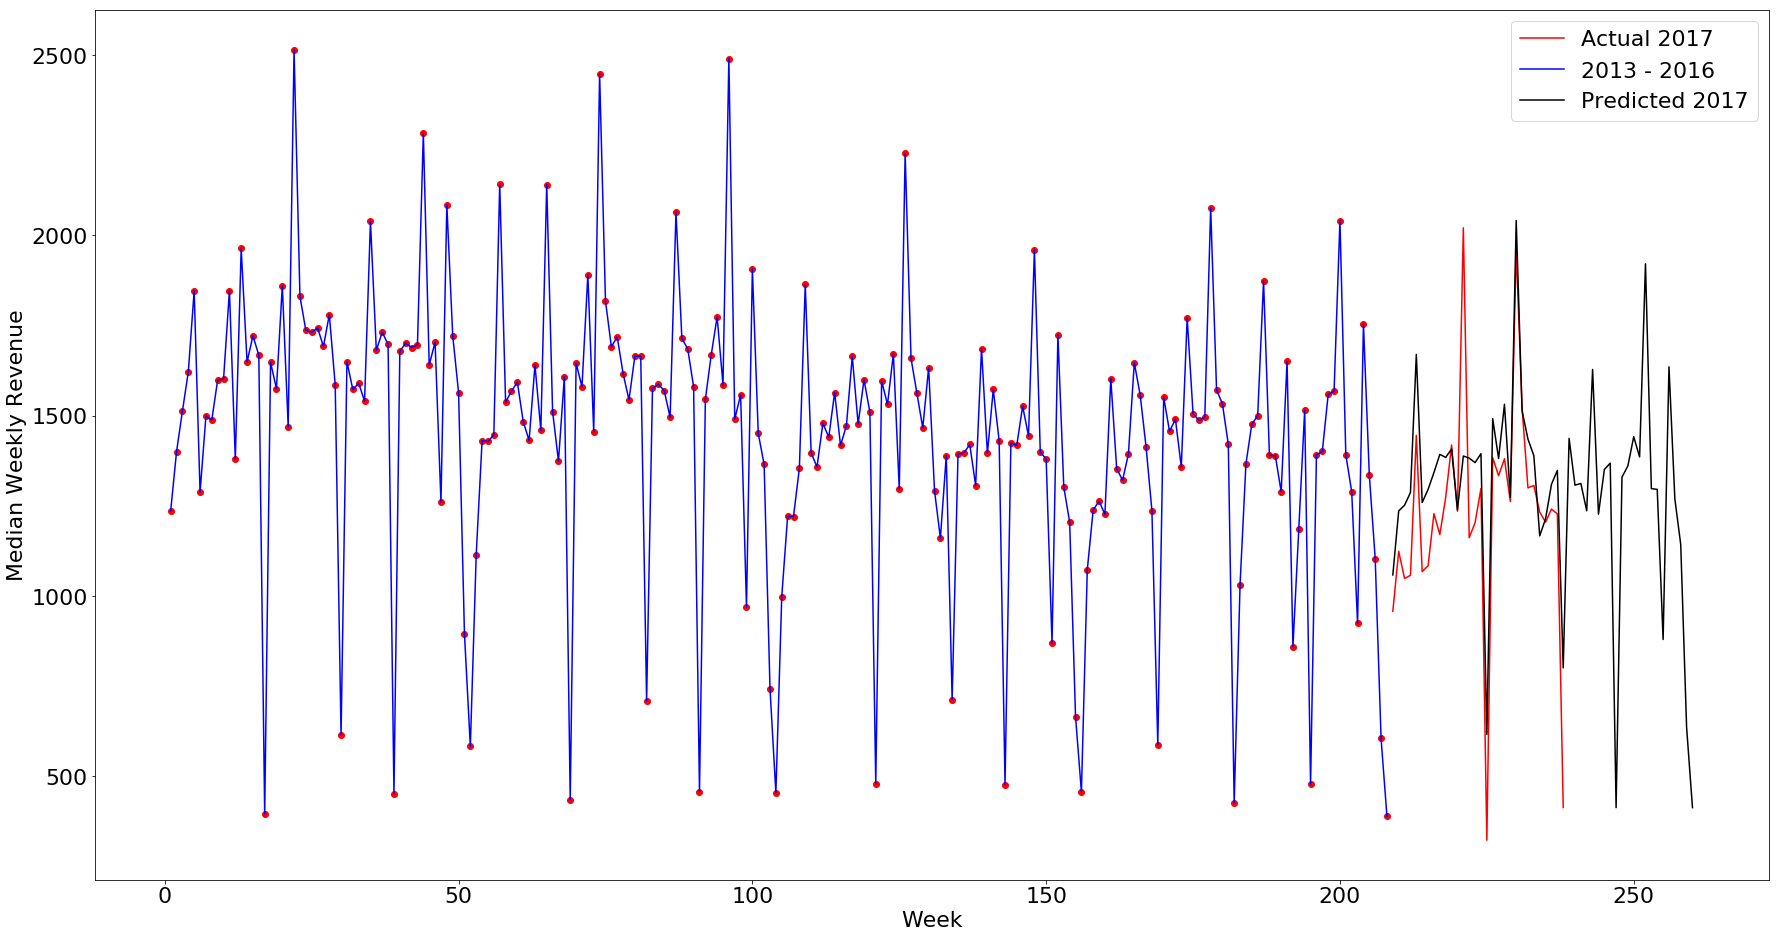

In [285]:
# plot result

import matplotlib.pyplot as plt
import numpy as np

# colors = ['g', 'r', 'k', 'm', 'c', 'y']
plt.figure(figsize = (30, 16))

plt.scatter(np.arange(1, 209), y, color = 'r')
plt.plot(np.arange(209, 261), actual_y, color = 'r', label = 'Actual 2017')
plt.plot(np.arange(1, 209), y, color = 'b', label = '2013 - 2016')
plt.plot(np.arange(209, 261), predictions, color = 'k', label = 'Predicted 2017')

# plt.scatter(np.arange(1, 157), y, color = 'r')
# plt.plot(np.arange(157, 209), actual_y, color = 'r', label = 'Actual 2017')
# plt.plot(np.arange(1, 157), y, color = 'b', label = '2013 - 2016')
# plt.plot(np.arange(157, 209), predictions, color = 'k', label = 'Predicted 2017')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Week', fontsize=22)
plt.ylabel('Median Weekly Revenue', fontsize=22)

plt.legend(fontsize=22)
plt.show()

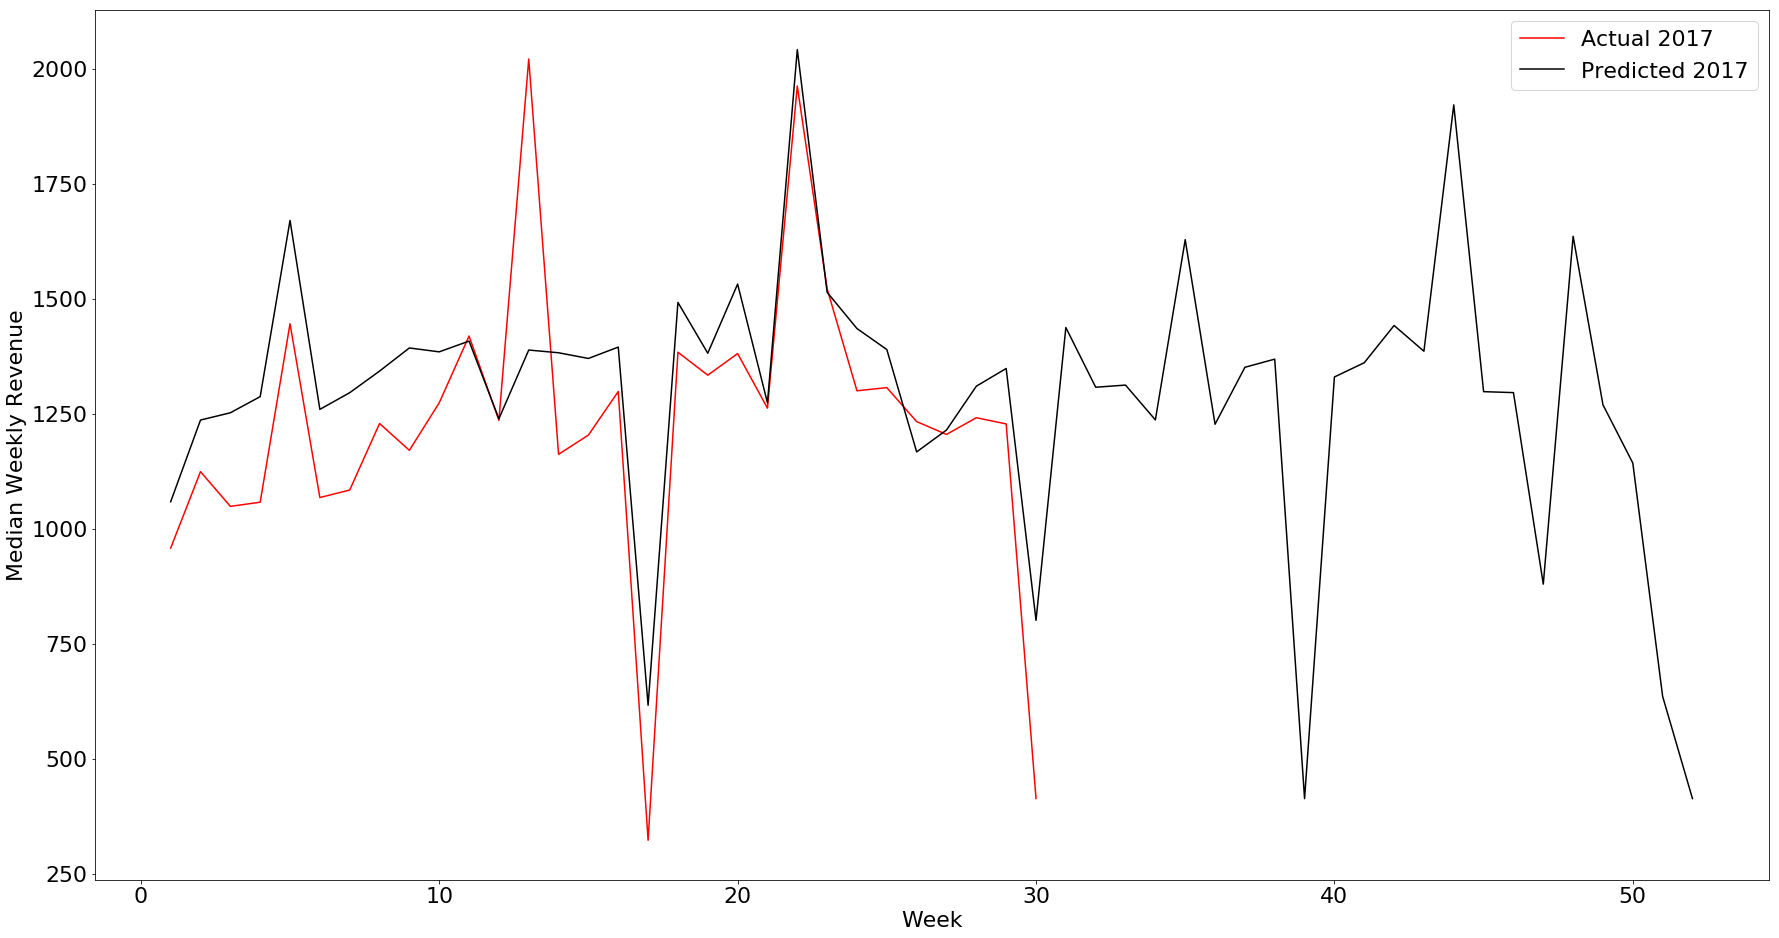

rmse: 194.724581318


In [286]:
from sklearn.metrics import mean_squared_error
from math import sqrt

plt.figure(figsize = (30, 16))
plt.plot(np.arange(1, 53), actual_y, color = 'r', label = 'Actual 2017')
plt.plot(np.arange(1, 53), predictions, color = 'k', label = 'Predicted 2017')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Week', fontsize=22)
plt.ylabel('Median Weekly Revenue', fontsize=22)

plt.legend(fontsize=22)
plt.show()

mse = mean_squared_error(actual_y[0:30], predictions[0:30])
print "rmse: " + str(sqrt(mse))